In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras.models import Model, Sequential
from librosa import display
from tensorflow.keras import layers

from classic_generator import classic_generator
from spectrogram_class import spectrogram


In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2022-08-03 08:15:06.463695: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-03 08:15:06.514075: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-03 08:15:06.550543: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-03 08:15:06.551144: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

True

In [3]:
instrument_list = [1, 7, 41, 42, 43, 44, 61, 69, 71, 72, 74]

In [4]:
note_list = [21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104]

# RNN-LSTM

In [5]:
def instrument_layer(inp, out_name):
    x = layers.LSTM(200)(inp)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(200, activation = 'relu')(x)
    x = layers.BatchNormalization()(x)
    out1 = layers.Dense(16, activation = 'softmax', name = out_name)(x)
    return out1

In [6]:
def instrument_layer_simple(input, out_name):
    out = layers.LSTM(len(note_list), return_sequences=True, name = f"{out_name}")(input)
    return out

In [7]:
inp = layers.Input((None, 500), batch_size=32, )

out = layers.LSTM(len(note_list), return_sequences = True)(inp)

model_2conv_two_out = Model(inp, out)

2022-08-03 08:15:07.631033: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-03 08:15:07.631438: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-03 08:15:07.631718: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-03 08:15:07.632270: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-03 08:15:07.632590: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

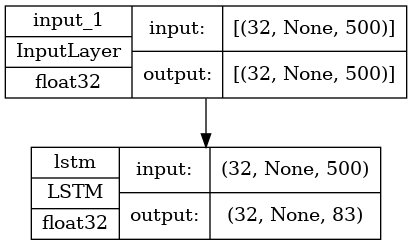

In [8]:
tf.keras.utils.plot_model(model_2conv_two_out , show_shapes=True, show_dtype=True)

In [9]:
instrument_list

[1, 7, 41, 42, 43, 44, 61, 69, 71, 72, 74]

In [10]:

inp = layers.Input((None, 256), batch_size=2)
normalizer = layers.BatchNormalization()(inp)

instrument_1 = layers.LSTM(len(note_list), activation = 'tanh', dropout = 0.2, 
                         name = 'instrument_1',return_sequences=True)(normalizer)
instrument_7 = layers.LSTM(len(note_list), activation = 'tanh', dropout = 0.2, 
                         name = 'instrument_7',return_sequences=True)(normalizer)
instrument_41 = layers.LSTM(len(note_list),activation = 'tanh', dropout = 0.2, 
                         name = 'instrument_41', return_sequences=True)(normalizer)
instrument_42 = layers.LSTM(len(note_list),activation = 'tanh', dropout = 0.2, 
                         name = 'instrument_42', return_sequences=True)(normalizer)
instrument_43 = layers.LSTM(len(note_list),activation = 'tanh', dropout = 0.2, 
                         name = 'instrument_43', return_sequences=True)(normalizer)
instrument_44 = layers.LSTM(len(note_list),activation = 'tanh', dropout = 0.2, 
                         name = 'instrument_44', return_sequences=True)(normalizer)
instrument_61 = layers.LSTM(len(note_list),activation = 'tanh', dropout = 0.2, 
                         name = 'instrument_61', return_sequences=True)(normalizer)
instrument_69 = layers.LSTM(len(note_list),activation = 'tanh', dropout = 0.2, 
                         name = 'instrument_69', return_sequences=True)(normalizer)
instrument_71 = layers.LSTM(len(note_list),activation = 'tanh', dropout = 0.2, 
                         name = 'instrument_71', return_sequences=True)(normalizer)
instrument_72 = layers.LSTM(len(note_list),activation = 'tanh', dropout = 0.2, 
                         name = 'instrument_72', return_sequences=True)(normalizer)
instrument_74 = layers.LSTM(len(note_list),activation = 'tanh', dropout = 0.2, 
                         name = 'instrument_74', return_sequences=True)(normalizer)

# simple_lstm_model = Model(inp, [instrument_layer_simple(inp, ins) for ins in instrument_list])

simple_lstm_model = Model(inp, [instrument_1, instrument_7, instrument_41, instrument_42, 
                            instrument_43, instrument_44, instrument_61, 
                            instrument_69, instrument_71, instrument_72,
                            instrument_74])

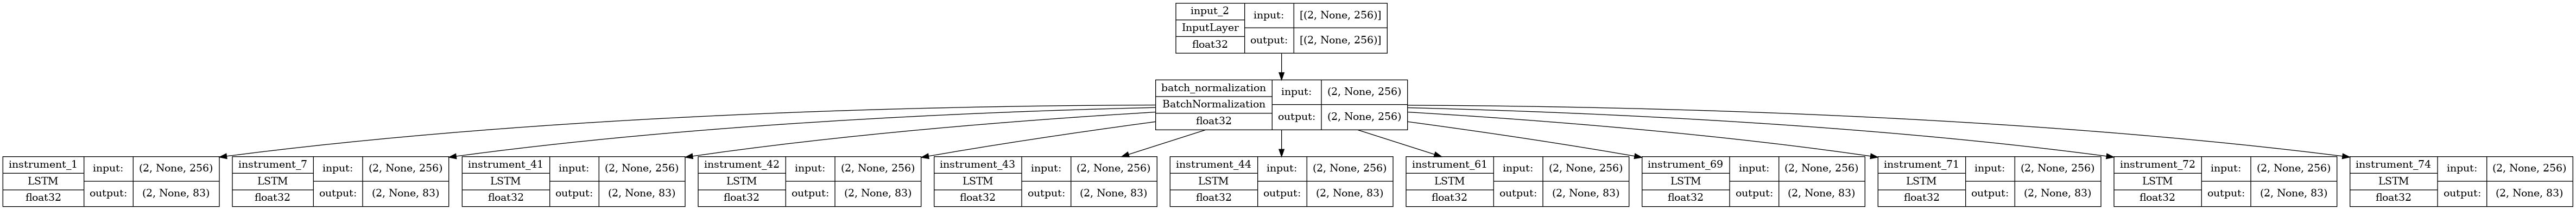

In [11]:

tf.keras.utils.plot_model(simple_lstm_model , show_shapes=True, show_dtype=True)

In [12]:
classic_train_generator = classic_generator(mode='train', batch_size=2)
                    
classic_eval_generator = classic_generator(mode = 'test', batch_size=2)

In [13]:

simple_lstm_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
              loss={f"instrument_{ins}": tf.keras.losses.CategoricalCrossentropy() 
                            for ins in instrument_list},
              metrics=['accuracy'])

In [14]:
newest_ckpt = !ls -dt $PWD/../models/classic_lstm/* | head -1
newest_ckpt = newest_ckpt[1]
newest_ckpt

'/home/shiya/Documents/music_transcription/notebooks/../models/classic_lstm/20220803_075512_01_classic_lstm'

In [15]:
simple_lstm_model = tf.keras.models.load_model(newest_ckpt)

In [16]:
simple_lstm_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(2, None, 256)]     0           []                               
                                                                                                  
 batch_normalization (BatchNorm  (2, None, 256)      1024        ['input_2[0][0]']                
 alization)                                                                                       
                                                                                                  
 instrument_1 (LSTM)            (2, None, 83)        112880      ['batch_normalization[0][0]']    
                                                                                                  
 instrument_7 (LSTM)            (2, None, 83)        112880      ['batch_normalization[0][0]

In [17]:
from datetime import datetime
from logging import warning
import warnings

warnings.filterwarnings('once', message='Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.')

ckpt_callback = tf.keras.callbacks.ModelCheckpoint(
    f"../models/classic_lstm/{datetime.now().strftime('%Y%m%d_%H%M%S')}_{{epoch:02d}}_classic_lstm", 
                                                    monitor='val_accuracy',
                                                    save_freq = 'epoch')
early_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)

with warnings.catch_warnings():
    warnings.filterwarnings(
        action='ignore',
        module= 'numba')
    
    simple_lstm_history = simple_lstm_model.fit(classic_train_generator, epochs= 10, 
                                                validation_data= classic_eval_generator, 
                                                validation_freq=1, 
                                                use_multiprocessing= True,
                                                workers= 3, 
                                                verbose= 1, 
                                                callbacks=[ckpt_callback])

Epoch 1/10


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

  1/160 [..............................] - ETA: 58:53 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.0877 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 1.0000 - instrument_42_accuracy: 1.0000 - instrument_43_accuracy: 1.0000 - instrument_44_accuracy: 1.0000 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 1.0000 - instrument_74_accuracy: 1.0000

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

  2/160 [..............................] - ETA: 9:04 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.2915 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 1.0000 - instrument_42_accuracy: 1.0000 - instrument_43_accuracy: 1.0000 - instrument_44_accuracy: 1.0000 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 1.0000 - instrument_74_accuracy: 1.0000 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


  3/160 [..............................] - ETA: 8:00 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.2335 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 1.0000 - instrument_42_accuracy: 1.0000 - instrument_43_accuracy: 1.0000 - instrument_44_accuracy: 1.0000 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 1.0000 - instrument_74_accuracy: 1.0000

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


  4/160 [..............................] - ETA: 8:46 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.3191 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 1.0000 - instrument_42_accuracy: 1.0000 - instrument_43_accuracy: 0.8752 - instrument_44_accuracy: 1.0000 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 1.0000 - instrument_74_accuracy: 1.0000

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


  5/160 [..............................] - ETA: 8:33 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.4265 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.8921 - instrument_42_accuracy: 0.9053 - instrument_43_accuracy: 0.8105 - instrument_44_accuracy: 1.0000 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 1.0000 - instrument_74_accuracy: 1.0000

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


  7/160 [>.............................] - ETA: 7:25 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.3812 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.8916 - instrument_42_accuracy: 0.9044 - instrument_43_accuracy: 0.8369 - instrument_44_accuracy: 1.0000 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 1.0000 - instrument_74_accuracy: 1.0000

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

  8/160 [>.............................] - ETA: 10:44 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.4270 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.8782 - instrument_42_accuracy: 0.9259 - instrument_43_accuracy: 0.8736 - instrument_44_accuracy: 1.0000 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 1.0000 - instrument_74_accuracy: 1.0000

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 10/160 [>.............................] - ETA: 10:15 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.4157 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.8748 - instrument_42_accuracy: 0.9010 - instrument_43_accuracy: 0.8679 - instrument_44_accuracy: 1.0000 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 1.0000 - instrument_74_accuracy: 1.0000

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 11/160 [=>............................] - ETA: 10:47 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.4242 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.8428 - instrument_42_accuracy: 0.8678 - instrument_43_accuracy: 0.8387 - instrument_44_accuracy: 0.9682 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 1.0000 - instrument_74_accuracy: 1.0000

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 12/160 [=>............................] - ETA: 10:28 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.4090 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.8570 - instrument_42_accuracy: 0.8797 - instrument_43_accuracy: 0.8532 - instrument_44_accuracy: 0.9711 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 1.0000 - instrument_74_accuracy: 1.0000

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 13/160 [=>............................] - ETA: 10:10 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.4225 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.8680 - instrument_42_accuracy: 0.8890 - instrument_43_accuracy: 0.8270 - instrument_44_accuracy: 0.9733 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 1.0000 - instrument_74_accuracy: 1.0000

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 14/160 [=>............................] - ETA: 9:47 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.4098 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.8754 - instrument_42_accuracy: 0.8952 - instrument_43_accuracy: 0.8366 - instrument_44_accuracy: 0.9748 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 1.0000 - instrument_74_accuracy: 1.0000 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 16/160 [==>...........................] - ETA: 9:19 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.3958 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.8912 - instrument_42_accuracy: 0.9085 - instrument_43_accuracy: 0.8573 - instrument_44_accuracy: 0.9780 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 1.0000 - instrument_74_accuracy: 1.0000

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 17/160 [==>...........................] - ETA: 9:40 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.4376 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.8446 - instrument_42_accuracy: 0.8657 - instrument_43_accuracy: 0.8184 - instrument_44_accuracy: 0.9795 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 1.0000 - instrument_74_accuracy: 1.0000

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 18/160 [==>...........................] - ETA: 9:13 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.4422 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.8386 - instrument_42_accuracy: 0.8609 - instrument_43_accuracy: 0.8158 - instrument_44_accuracy: 0.9800 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 0.9945 - instrument_74_accuracy: 1.0000

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 19/160 [==>...........................] - ETA: 8:57 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.4494 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.8453 - instrument_42_accuracy: 0.8667 - instrument_43_accuracy: 0.8032 - instrument_44_accuracy: 0.9808 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 0.9947 - instrument_74_accuracy: 1.0000

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 20/160 [==>...........................] - ETA: 8:49 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.4554 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.8227 - instrument_42_accuracy: 0.8573 - instrument_43_accuracy: 0.7924 - instrument_44_accuracy: 0.9818 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 0.9950 - instrument_74_accuracy: 1.0000

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 23/160 [===>..........................] - ETA: 8:30 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5000 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.7943 - instrument_42_accuracy: 0.8398 - instrument_43_accuracy: 0.7805 - instrument_44_accuracy: 0.9840 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 0.9956 - instrument_74_accuracy: 0.9859

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 24/160 [===>..........................] - ETA: 8:54 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.4840 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.8054 - instrument_42_accuracy: 0.8484 - instrument_43_accuracy: 0.7923 - instrument_44_accuracy: 0.9849 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 0.9958 - instrument_74_accuracy: 0.9867

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 25/160 [===>..........................] - ETA: 8:47 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.4857 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.8108 - instrument_42_accuracy: 0.8529 - instrument_43_accuracy: 0.7991 - instrument_44_accuracy: 0.9855 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 0.9960 - instrument_74_accuracy: 0.9873

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 26/160 [===>..........................] - ETA: 8:48 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.4730 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.8094 - instrument_42_accuracy: 0.8477 - instrument_43_accuracy: 0.7977 - instrument_44_accuracy: 0.9863 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 0.9962 - instrument_74_accuracy: 0.9879

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 27/160 [====>.........................] - ETA: 8:45 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.4707 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.8187 - instrument_42_accuracy: 0.8552 - instrument_43_accuracy: 0.8076 - instrument_44_accuracy: 0.9869 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 0.9964 - instrument_74_accuracy: 0.9885

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 28/160 [====>.........................] - ETA: 8:37 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.4685 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.8137 - instrument_42_accuracy: 0.8599 - instrument_43_accuracy: 0.8139 - instrument_44_accuracy: 0.9874 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 0.9965 - instrument_74_accuracy: 0.9889

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 29/160 [====>.........................] - ETA: 8:31 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.4664 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.8062 - instrument_42_accuracy: 0.8497 - instrument_43_accuracy: 0.8084 - instrument_44_accuracy: 0.9879 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 0.9966 - instrument_74_accuracy: 0.9893

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 30/160 [====>.........................] - ETA: 8:30 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.4861 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.7961 - instrument_42_accuracy: 0.8552 - instrument_43_accuracy: 0.7986 - instrument_44_accuracy: 0.9883 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 0.9968 - instrument_74_accuracy: 0.9897

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 31/160 [====>.........................] - ETA: 8:23 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.4771 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.7967 - instrument_42_accuracy: 0.8598 - instrument_43_accuracy: 0.7989 - instrument_44_accuracy: 0.9887 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 0.9969 - instrument_74_accuracy: 0.9900

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 32/160 [=====>........................] - ETA: 8:22 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.4782 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.7907 - instrument_42_accuracy: 0.8524 - instrument_43_accuracy: 0.7942 - instrument_44_accuracy: 0.9891 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 0.9970 - instrument_74_accuracy: 0.9904

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 34/160 [=====>........................] - ETA: 8:13 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.4632 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.8012 - instrument_42_accuracy: 0.8598 - instrument_43_accuracy: 0.8045 - instrument_44_accuracy: 0.9896 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 0.9862 - instrument_74_accuracy: 0.9908

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 35/160 [=====>........................] - ETA: 8:13 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.4551 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.8074 - instrument_42_accuracy: 0.8642 - instrument_43_accuracy: 0.8106 - instrument_44_accuracy: 0.9899 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 0.9866 - instrument_74_accuracy: 0.9911

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 37/160 [=====>........................] - ETA: 8:20 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.4632 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.7832 - instrument_42_accuracy: 0.8527 - instrument_43_accuracy: 0.7972 - instrument_44_accuracy: 0.9907 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 0.9876 - instrument_74_accuracy: 0.9918

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 38/160 [======>.......................] - ETA: 8:13 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.4576 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.7881 - instrument_42_accuracy: 0.8560 - instrument_43_accuracy: 0.7938 - instrument_44_accuracy: 0.9909 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 0.9879 - instrument_74_accuracy: 0.9920

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 39/160 [======>.......................] - ETA: 8:42 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.4603 - instrument_7_accuracy: 1.0000 - instrument_41_accuracy: 0.7853 - instrument_42_accuracy: 0.8514 - instrument_43_accuracy: 0.7938 - instrument_44_accuracy: 0.9913 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 0.9885 - instrument_74_accuracy: 0.9924

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 40/160 [======>.......................] - ETA: 8:44 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.4869 - instrument_7_accuracy: 0.9941 - instrument_41_accuracy: 0.7682 - instrument_42_accuracy: 0.8405 - instrument_43_accuracy: 0.7892 - instrument_44_accuracy: 0.9918 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 0.9891 - instrument_74_accuracy: 0.9927

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 41/160 [======>.......................] - ETA: 8:49 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5128 - instrument_7_accuracy: 0.9944 - instrument_41_accuracy: 0.7491 - instrument_42_accuracy: 0.8223 - instrument_43_accuracy: 0.7760 - instrument_44_accuracy: 0.9922 - instrument_61_accuracy: 1.0000 - instrument_69_accuracy: 1.0000 - instrument_71_accuracy: 1.0000 - instrument_72_accuracy: 0.9896 - instrument_74_accuracy: 0.9931

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 42/160 [======>.......................] - ETA: 8:41 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5144 - instrument_7_accuracy: 0.9945 - instrument_41_accuracy: 0.7546 - instrument_42_accuracy: 0.8262 - instrument_43_accuracy: 0.7809 - instrument_44_accuracy: 0.9923 - instrument_61_accuracy: 0.9931 - instrument_69_accuracy: 0.9932 - instrument_71_accuracy: 0.9925 - instrument_72_accuracy: 0.9824 - instrument_74_accuracy: 0.9874

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 43/160 [=======>......................] - ETA: 8:33 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5145 - instrument_7_accuracy: 0.9946 - instrument_41_accuracy: 0.7538 - instrument_42_accuracy: 0.8250 - instrument_43_accuracy: 0.7808 - instrument_44_accuracy: 0.9925 - instrument_61_accuracy: 0.9933 - instrument_69_accuracy: 0.9934 - instrument_71_accuracy: 0.9926 - instrument_72_accuracy: 0.9828 - instrument_74_accuracy: 0.9876

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 44/160 [=======>......................] - ETA: 8:22 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5145 - instrument_7_accuracy: 0.9947 - instrument_41_accuracy: 0.7538 - instrument_42_accuracy: 0.8247 - instrument_43_accuracy: 0.7812 - instrument_44_accuracy: 0.9926 - instrument_61_accuracy: 0.9934 - instrument_69_accuracy: 0.9935 - instrument_71_accuracy: 0.9927 - instrument_72_accuracy: 0.9830 - instrument_74_accuracy: 0.9878

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 45/160 [=======>......................] - ETA: 8:20 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5093 - instrument_7_accuracy: 0.9949 - instrument_41_accuracy: 0.7577 - instrument_42_accuracy: 0.8304 - instrument_43_accuracy: 0.7884 - instrument_44_accuracy: 0.9928 - instrument_61_accuracy: 0.9900 - instrument_69_accuracy: 0.9937 - instrument_71_accuracy: 0.9930 - instrument_72_accuracy: 0.9836 - instrument_74_accuracy: 0.9882

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 46/160 [=======>......................] - ETA: 8:13 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5076 - instrument_7_accuracy: 0.9950 - instrument_41_accuracy: 0.7627 - instrument_42_accuracy: 0.8339 - instrument_43_accuracy: 0.7928 - instrument_44_accuracy: 0.9930 - instrument_61_accuracy: 0.9902 - instrument_69_accuracy: 0.9938 - instrument_71_accuracy: 0.9931 - instrument_72_accuracy: 0.9839 - instrument_74_accuracy: 0.9884

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 47/160 [=======>......................] - ETA: 8:06 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5078 - instrument_7_accuracy: 0.9951 - instrument_41_accuracy: 0.7674 - instrument_42_accuracy: 0.8372 - instrument_43_accuracy: 0.7968 - instrument_44_accuracy: 0.9931 - instrument_61_accuracy: 0.9883 - instrument_69_accuracy: 0.9939 - instrument_71_accuracy: 0.9903 - instrument_72_accuracy: 0.9808 - instrument_74_accuracy: 0.9887

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 49/160 [========>.....................] - ETA: 8:04 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5129 - instrument_7_accuracy: 0.9953 - instrument_41_accuracy: 0.7739 - instrument_42_accuracy: 0.8407 - instrument_43_accuracy: 0.8034 - instrument_44_accuracy: 0.9935 - instrument_61_accuracy: 0.9832 - instrument_69_accuracy: 0.9875 - instrument_71_accuracy: 0.9824 - instrument_72_accuracy: 0.9723 - instrument_74_accuracy: 0.9892

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 50/160 [========>.....................] - ETA: 7:58 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5111 - instrument_7_accuracy: 0.9954 - instrument_41_accuracy: 0.7783 - instrument_42_accuracy: 0.8439 - instrument_43_accuracy: 0.8072 - instrument_44_accuracy: 0.9936 - instrument_61_accuracy: 0.9836 - instrument_69_accuracy: 0.9877 - instrument_71_accuracy: 0.9827 - instrument_72_accuracy: 0.9711 - instrument_74_accuracy: 0.9894

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 52/160 [========>.....................] - ETA: 7:46 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5122 - instrument_7_accuracy: 0.9956 - instrument_41_accuracy: 0.7830 - instrument_42_accuracy: 0.8441 - instrument_43_accuracy: 0.8093 - instrument_44_accuracy: 0.9921 - instrument_61_accuracy: 0.9813 - instrument_69_accuracy: 0.9882 - instrument_71_accuracy: 0.9793 - instrument_72_accuracy: 0.9677 - instrument_74_accuracy: 0.9864

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 53/160 [========>.....................] - ETA: 7:41 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5127 - instrument_7_accuracy: 0.9957 - instrument_41_accuracy: 0.7750 - instrument_42_accuracy: 0.8426 - instrument_43_accuracy: 0.8091 - instrument_44_accuracy: 0.9923 - instrument_61_accuracy: 0.9817 - instrument_69_accuracy: 0.9884 - instrument_71_accuracy: 0.9797 - instrument_72_accuracy: 0.9683 - instrument_74_accuracy: 0.9867

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 54/160 [=========>....................] - ETA: 7:33 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5152 - instrument_7_accuracy: 0.9957 - instrument_41_accuracy: 0.7779 - instrument_42_accuracy: 0.8446 - instrument_43_accuracy: 0.8052 - instrument_44_accuracy: 0.9924 - instrument_61_accuracy: 0.9820 - instrument_69_accuracy: 0.9886 - instrument_71_accuracy: 0.9799 - instrument_72_accuracy: 0.9688 - instrument_74_accuracy: 0.9869

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 55/160 [=========>....................] - ETA: 7:28 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5091 - instrument_7_accuracy: 0.9958 - instrument_41_accuracy: 0.7761 - instrument_42_accuracy: 0.8414 - instrument_43_accuracy: 0.8035 - instrument_44_accuracy: 0.9870 - instrument_61_accuracy: 0.9823 - instrument_69_accuracy: 0.9888 - instrument_71_accuracy: 0.9804 - instrument_72_accuracy: 0.9694 - instrument_74_accuracy: 0.9871

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 56/160 [=========>....................] - ETA: 7:23 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5101 - instrument_7_accuracy: 0.9959 - instrument_41_accuracy: 0.7681 - instrument_42_accuracy: 0.8396 - instrument_43_accuracy: 0.8032 - instrument_44_accuracy: 0.9873 - instrument_61_accuracy: 0.9827 - instrument_69_accuracy: 0.9890 - instrument_71_accuracy: 0.9808 - instrument_72_accuracy: 0.9662 - instrument_74_accuracy: 0.9874

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 57/160 [=========>....................] - ETA: 7:17 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5162 - instrument_7_accuracy: 0.9960 - instrument_41_accuracy: 0.7653 - instrument_42_accuracy: 0.8370 - instrument_43_accuracy: 0.8016 - instrument_44_accuracy: 0.9875 - instrument_61_accuracy: 0.9830 - instrument_69_accuracy: 0.9892 - instrument_71_accuracy: 0.9811 - instrument_72_accuracy: 0.9668 - instrument_74_accuracy: 0.9876

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 58/160 [=========>....................] - ETA: 7:08 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5138 - instrument_7_accuracy: 0.9960 - instrument_41_accuracy: 0.7674 - instrument_42_accuracy: 0.8384 - instrument_43_accuracy: 0.8006 - instrument_44_accuracy: 0.9876 - instrument_61_accuracy: 0.9831 - instrument_69_accuracy: 0.9893 - instrument_71_accuracy: 0.9812 - instrument_72_accuracy: 0.9671 - instrument_74_accuracy: 0.9877

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 59/160 [==========>...................] - ETA: 7:03 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5190 - instrument_7_accuracy: 0.9961 - instrument_41_accuracy: 0.7643 - instrument_42_accuracy: 0.8357 - instrument_43_accuracy: 0.7989 - instrument_44_accuracy: 0.9878 - instrument_61_accuracy: 0.9834 - instrument_69_accuracy: 0.9895 - instrument_71_accuracy: 0.9816 - instrument_72_accuracy: 0.9676 - instrument_74_accuracy: 0.9879

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 60/160 [==========>...................] - ETA: 6:56 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5181 - instrument_7_accuracy: 0.9961 - instrument_41_accuracy: 0.7673 - instrument_42_accuracy: 0.8377 - instrument_43_accuracy: 0.8014 - instrument_44_accuracy: 0.9879 - instrument_61_accuracy: 0.9836 - instrument_69_accuracy: 0.9896 - instrument_71_accuracy: 0.9818 - instrument_72_accuracy: 0.9680 - instrument_74_accuracy: 0.9881

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 61/160 [==========>...................] - ETA: 6:50 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5193 - instrument_7_accuracy: 0.9962 - instrument_41_accuracy: 0.7703 - instrument_42_accuracy: 0.8398 - instrument_43_accuracy: 0.7977 - instrument_44_accuracy: 0.9881 - instrument_61_accuracy: 0.9838 - instrument_69_accuracy: 0.9898 - instrument_71_accuracy: 0.9820 - instrument_72_accuracy: 0.9684 - instrument_74_accuracy: 0.9882

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 62/160 [==========>...................] - ETA: 6:43 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5147 - instrument_7_accuracy: 0.9962 - instrument_41_accuracy: 0.7730 - instrument_42_accuracy: 0.8417 - instrument_43_accuracy: 0.8001 - instrument_44_accuracy: 0.9882 - instrument_61_accuracy: 0.9840 - instrument_69_accuracy: 0.9899 - instrument_71_accuracy: 0.9822 - instrument_72_accuracy: 0.9688 - instrument_74_accuracy: 0.9884

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 64/160 [===========>..................] - ETA: 6:30 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5105 - instrument_7_accuracy: 0.9963 - instrument_41_accuracy: 0.7713 - instrument_42_accuracy: 0.8455 - instrument_43_accuracy: 0.8025 - instrument_44_accuracy: 0.9885 - instrument_61_accuracy: 0.9807 - instrument_69_accuracy: 0.9901 - instrument_71_accuracy: 0.9826 - instrument_72_accuracy: 0.9696 - instrument_74_accuracy: 0.9886

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 65/160 [===========>..................] - ETA: 6:24 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5156 - instrument_7_accuracy: 0.9964 - instrument_41_accuracy: 0.7717 - instrument_42_accuracy: 0.8453 - instrument_43_accuracy: 0.8033 - instrument_44_accuracy: 0.9886 - instrument_61_accuracy: 0.9782 - instrument_69_accuracy: 0.9867 - instrument_71_accuracy: 0.9792 - instrument_72_accuracy: 0.9663 - instrument_74_accuracy: 0.9854

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 66/160 [===========>..................] - ETA: 6:18 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5169 - instrument_7_accuracy: 0.9964 - instrument_41_accuracy: 0.7748 - instrument_42_accuracy: 0.8474 - instrument_43_accuracy: 0.8010 - instrument_44_accuracy: 0.9888 - instrument_61_accuracy: 0.9761 - instrument_69_accuracy: 0.9829 - instrument_71_accuracy: 0.9751 - instrument_72_accuracy: 0.9622 - instrument_74_accuracy: 0.9822

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 67/160 [===========>..................] - ETA: 6:24 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5273 - instrument_7_accuracy: 0.9965 - instrument_41_accuracy: 0.7659 - instrument_42_accuracy: 0.8393 - instrument_43_accuracy: 0.7945 - instrument_44_accuracy: 0.9890 - instrument_61_accuracy: 0.9766 - instrument_69_accuracy: 0.9833 - instrument_71_accuracy: 0.9757 - instrument_72_accuracy: 0.9630 - instrument_74_accuracy: 0.9826

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 68/160 [===========>..................] - ETA: 6:19 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5280 - instrument_7_accuracy: 0.9965 - instrument_41_accuracy: 0.7696 - instrument_42_accuracy: 0.8419 - instrument_43_accuracy: 0.7977 - instrument_44_accuracy: 0.9892 - instrument_61_accuracy: 0.9733 - instrument_69_accuracy: 0.9774 - instrument_71_accuracy: 0.9695 - instrument_72_accuracy: 0.9588 - instrument_74_accuracy: 0.9829

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 69/160 [===========>..................] - ETA: 6:16 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5220 - instrument_7_accuracy: 0.9966 - instrument_41_accuracy: 0.7738 - instrument_42_accuracy: 0.8448 - instrument_43_accuracy: 0.8015 - instrument_44_accuracy: 0.9894 - instrument_61_accuracy: 0.9738 - instrument_69_accuracy: 0.9778 - instrument_71_accuracy: 0.9700 - instrument_72_accuracy: 0.9595 - instrument_74_accuracy: 0.9832

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 70/160 [============>.................] - ETA: 6:15 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5194 - instrument_7_accuracy: 0.9967 - instrument_41_accuracy: 0.7755 - instrument_42_accuracy: 0.8477 - instrument_43_accuracy: 0.8051 - instrument_44_accuracy: 0.9896 - instrument_61_accuracy: 0.9743 - instrument_69_accuracy: 0.9782 - instrument_71_accuracy: 0.9706 - instrument_72_accuracy: 0.9603 - instrument_74_accuracy: 0.9835

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 71/160 [============>.................] - ETA: 6:10 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5158 - instrument_7_accuracy: 0.9967 - instrument_41_accuracy: 0.7783 - instrument_42_accuracy: 0.8495 - instrument_43_accuracy: 0.8075 - instrument_44_accuracy: 0.9897 - instrument_61_accuracy: 0.9746 - instrument_69_accuracy: 0.9785 - instrument_71_accuracy: 0.9709 - instrument_72_accuracy: 0.9608 - instrument_74_accuracy: 0.9837

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 73/160 [============>.................] - ETA: 5:59 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5129 - instrument_7_accuracy: 0.9968 - instrument_41_accuracy: 0.7814 - instrument_42_accuracy: 0.8513 - instrument_43_accuracy: 0.8104 - instrument_44_accuracy: 0.9900 - instrument_61_accuracy: 0.9752 - instrument_69_accuracy: 0.9790 - instrument_71_accuracy: 0.9716 - instrument_72_accuracy: 0.9617 - instrument_74_accuracy: 0.9841

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 74/160 [============>.................] - ETA: 5:59 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5132 - instrument_7_accuracy: 0.9968 - instrument_41_accuracy: 0.7784 - instrument_42_accuracy: 0.8484 - instrument_43_accuracy: 0.8084 - instrument_44_accuracy: 0.9901 - instrument_61_accuracy: 0.9756 - instrument_69_accuracy: 0.9793 - instrument_71_accuracy: 0.9720 - instrument_72_accuracy: 0.9622 - instrument_74_accuracy: 0.9843

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 75/160 [=============>................] - ETA: 5:54 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5191 - instrument_7_accuracy: 0.9910 - instrument_41_accuracy: 0.7725 - instrument_42_accuracy: 0.8473 - instrument_43_accuracy: 0.8079 - instrument_44_accuracy: 0.9902 - instrument_61_accuracy: 0.9759 - instrument_69_accuracy: 0.9795 - instrument_71_accuracy: 0.9724 - instrument_72_accuracy: 0.9627 - instrument_74_accuracy: 0.9845

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 76/160 [=============>................] - ETA: 5:48 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5173 - instrument_7_accuracy: 0.9911 - instrument_41_accuracy: 0.7743 - instrument_42_accuracy: 0.8486 - instrument_43_accuracy: 0.8094 - instrument_44_accuracy: 0.9903 - instrument_61_accuracy: 0.9761 - instrument_69_accuracy: 0.9797 - instrument_71_accuracy: 0.9726 - instrument_72_accuracy: 0.9630 - instrument_74_accuracy: 0.9846

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 77/160 [=============>................] - ETA: 5:52 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5216 - instrument_7_accuracy: 0.9912 - instrument_41_accuracy: 0.7662 - instrument_42_accuracy: 0.8438 - instrument_43_accuracy: 0.8072 - instrument_44_accuracy: 0.9905 - instrument_61_accuracy: 0.9765 - instrument_69_accuracy: 0.9801 - instrument_71_accuracy: 0.9731 - instrument_72_accuracy: 0.9637 - instrument_74_accuracy: 0.9849

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 78/160 [=============>................] - ETA: 5:48 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5286 - instrument_7_accuracy: 0.9914 - instrument_41_accuracy: 0.7609 - instrument_42_accuracy: 0.8381 - instrument_43_accuracy: 0.8033 - instrument_44_accuracy: 0.9906 - instrument_61_accuracy: 0.9769 - instrument_69_accuracy: 0.9804 - instrument_71_accuracy: 0.9735 - instrument_72_accuracy: 0.9642 - instrument_74_accuracy: 0.9852

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 79/160 [=============>................] - ETA: 5:44 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5284 - instrument_7_accuracy: 0.9915 - instrument_41_accuracy: 0.7601 - instrument_42_accuracy: 0.8368 - instrument_43_accuracy: 0.8033 - instrument_44_accuracy: 0.9908 - instrument_61_accuracy: 0.9773 - instrument_69_accuracy: 0.9807 - instrument_71_accuracy: 0.9740 - instrument_72_accuracy: 0.9648 - instrument_74_accuracy: 0.9854

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 80/160 [==============>...............] - ETA: 5:39 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5309 - instrument_7_accuracy: 0.9916 - instrument_41_accuracy: 0.7556 - instrument_42_accuracy: 0.8336 - instrument_43_accuracy: 0.8004 - instrument_44_accuracy: 0.9909 - instrument_61_accuracy: 0.9775 - instrument_69_accuracy: 0.9809 - instrument_71_accuracy: 0.9743 - instrument_72_accuracy: 0.9653 - instrument_74_accuracy: 0.9856

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 81/160 [==============>...............] - ETA: 5:35 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5284 - instrument_7_accuracy: 0.9917 - instrument_41_accuracy: 0.7594 - instrument_42_accuracy: 0.8362 - instrument_43_accuracy: 0.8035 - instrument_44_accuracy: 0.9910 - instrument_61_accuracy: 0.9779 - instrument_69_accuracy: 0.9812 - instrument_71_accuracy: 0.9747 - instrument_72_accuracy: 0.9658 - instrument_74_accuracy: 0.9858

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 82/160 [==============>...............] - ETA: 5:29 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5250 - instrument_7_accuracy: 0.9918 - instrument_41_accuracy: 0.7615 - instrument_42_accuracy: 0.8376 - instrument_43_accuracy: 0.8052 - instrument_44_accuracy: 0.9911 - instrument_61_accuracy: 0.9781 - instrument_69_accuracy: 0.9814 - instrument_71_accuracy: 0.9749 - instrument_72_accuracy: 0.9661 - instrument_74_accuracy: 0.9859

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 83/160 [==============>...............] - ETA: 5:23 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5226 - instrument_7_accuracy: 0.9919 - instrument_41_accuracy: 0.7616 - instrument_42_accuracy: 0.8388 - instrument_43_accuracy: 0.8067 - instrument_44_accuracy: 0.9912 - instrument_61_accuracy: 0.9782 - instrument_69_accuracy: 0.9815 - instrument_71_accuracy: 0.9751 - instrument_72_accuracy: 0.9664 - instrument_74_accuracy: 0.9860

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 84/160 [==============>...............] - ETA: 5:22 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5278 - instrument_7_accuracy: 0.9920 - instrument_41_accuracy: 0.7584 - instrument_42_accuracy: 0.8347 - instrument_43_accuracy: 0.8039 - instrument_44_accuracy: 0.9913 - instrument_61_accuracy: 0.9786 - instrument_69_accuracy: 0.9819 - instrument_71_accuracy: 0.9755 - instrument_72_accuracy: 0.9670 - instrument_74_accuracy: 0.9863

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 85/160 [==============>...............] - ETA: 5:17 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5268 - instrument_7_accuracy: 0.9921 - instrument_41_accuracy: 0.7601 - instrument_42_accuracy: 0.8356 - instrument_43_accuracy: 0.8053 - instrument_44_accuracy: 0.9914 - instrument_61_accuracy: 0.9789 - instrument_69_accuracy: 0.9821 - instrument_71_accuracy: 0.9758 - instrument_72_accuracy: 0.9673 - instrument_74_accuracy: 0.9864

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 86/160 [===============>..............] - ETA: 5:10 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5273 - instrument_7_accuracy: 0.9921 - instrument_41_accuracy: 0.7611 - instrument_42_accuracy: 0.8363 - instrument_43_accuracy: 0.8061 - instrument_44_accuracy: 0.9915 - instrument_61_accuracy: 0.9780 - instrument_69_accuracy: 0.9810 - instrument_71_accuracy: 0.9745 - instrument_72_accuracy: 0.9660 - instrument_74_accuracy: 0.9857

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 87/160 [===============>..............] - ETA: 5:05 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5307 - instrument_7_accuracy: 0.9922 - instrument_41_accuracy: 0.7571 - instrument_42_accuracy: 0.8336 - instrument_43_accuracy: 0.8039 - instrument_44_accuracy: 0.9916 - instrument_61_accuracy: 0.9768 - instrument_69_accuracy: 0.9812 - instrument_71_accuracy: 0.9748 - instrument_72_accuracy: 0.9664 - instrument_74_accuracy: 0.9858

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 88/160 [===============>..............] - ETA: 5:00 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5306 - instrument_7_accuracy: 0.9923 - instrument_41_accuracy: 0.7599 - instrument_42_accuracy: 0.8355 - instrument_43_accuracy: 0.8061 - instrument_44_accuracy: 0.9917 - instrument_61_accuracy: 0.9766 - instrument_69_accuracy: 0.9808 - instrument_71_accuracy: 0.9744 - instrument_72_accuracy: 0.9661 - instrument_74_accuracy: 0.9860

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 89/160 [===============>..............] - ETA: 5:03 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5343 - instrument_7_accuracy: 0.9925 - instrument_41_accuracy: 0.7557 - instrument_42_accuracy: 0.8356 - instrument_43_accuracy: 0.8082 - instrument_44_accuracy: 0.9918 - instrument_61_accuracy: 0.9771 - instrument_69_accuracy: 0.9812 - instrument_71_accuracy: 0.9750 - instrument_72_accuracy: 0.9668 - instrument_74_accuracy: 0.9863

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 90/160 [===============>..............] - ETA: 4:58 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5351 - instrument_7_accuracy: 0.9925 - instrument_41_accuracy: 0.7538 - instrument_42_accuracy: 0.8337 - instrument_43_accuracy: 0.8066 - instrument_44_accuracy: 0.9919 - instrument_61_accuracy: 0.9773 - instrument_69_accuracy: 0.9814 - instrument_71_accuracy: 0.9752 - instrument_72_accuracy: 0.9671 - instrument_74_accuracy: 0.9864

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 91/160 [================>.............] - ETA: 4:53 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5352 - instrument_7_accuracy: 0.9926 - instrument_41_accuracy: 0.7539 - instrument_42_accuracy: 0.8352 - instrument_43_accuracy: 0.8085 - instrument_44_accuracy: 0.9920 - instrument_61_accuracy: 0.9775 - instrument_69_accuracy: 0.9816 - instrument_71_accuracy: 0.9754 - instrument_72_accuracy: 0.9674 - instrument_74_accuracy: 0.9865

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 92/160 [================>.............] - ETA: 4:53 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5453 - instrument_7_accuracy: 0.9928 - instrument_41_accuracy: 0.7541 - instrument_42_accuracy: 0.8346 - instrument_43_accuracy: 0.8090 - instrument_44_accuracy: 0.9922 - instrument_61_accuracy: 0.9700 - instrument_69_accuracy: 0.9820 - instrument_71_accuracy: 0.9666 - instrument_72_accuracy: 0.9590 - instrument_74_accuracy: 0.9868

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 93/160 [================>.............] - ETA: 4:48 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5450 - instrument_7_accuracy: 0.9928 - instrument_41_accuracy: 0.7533 - instrument_42_accuracy: 0.8361 - instrument_43_accuracy: 0.8108 - instrument_44_accuracy: 0.9922 - instrument_61_accuracy: 0.9703 - instrument_69_accuracy: 0.9822 - instrument_71_accuracy: 0.9669 - instrument_72_accuracy: 0.9593 - instrument_74_accuracy: 0.9870

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 94/160 [================>.............] - ETA: 4:42 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5482 - instrument_7_accuracy: 0.9929 - instrument_41_accuracy: 0.7521 - instrument_42_accuracy: 0.8346 - instrument_43_accuracy: 0.8064 - instrument_44_accuracy: 0.9923 - instrument_61_accuracy: 0.9705 - instrument_69_accuracy: 0.9823 - instrument_71_accuracy: 0.9672 - instrument_72_accuracy: 0.9596 - instrument_74_accuracy: 0.9870

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 95/160 [================>.............] - ETA: 4:36 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5486 - instrument_7_accuracy: 0.9929 - instrument_41_accuracy: 0.7498 - instrument_42_accuracy: 0.8337 - instrument_43_accuracy: 0.8058 - instrument_44_accuracy: 0.9923 - instrument_61_accuracy: 0.9707 - instrument_69_accuracy: 0.9824 - instrument_71_accuracy: 0.9673 - instrument_72_accuracy: 0.9581 - instrument_74_accuracy: 0.9871

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

 96/160 [=================>............] - ETA: 4:32 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5509 - instrument_7_accuracy: 0.9930 - instrument_41_accuracy: 0.7532 - instrument_42_accuracy: 0.8360 - instrument_43_accuracy: 0.8055 - instrument_44_accuracy: 0.9924 - instrument_61_accuracy: 0.9680 - instrument_69_accuracy: 0.9791 - instrument_71_accuracy: 0.9645 - instrument_72_accuracy: 0.9550 - instrument_74_accuracy: 0.9840

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


 99/160 [=================>............] - ETA: 4:16 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5489 - instrument_7_accuracy: 0.9932 - instrument_41_accuracy: 0.7532 - instrument_42_accuracy: 0.8370 - instrument_43_accuracy: 0.8071 - instrument_44_accuracy: 0.9926 - instrument_61_accuracy: 0.9686 - instrument_69_accuracy: 0.9795 - instrument_71_accuracy: 0.9652 - instrument_72_accuracy: 0.9558 - instrument_74_accuracy: 0.9843

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


100/160 [=================>............] - ETA: 4:10 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5471 - instrument_7_accuracy: 0.9932 - instrument_41_accuracy: 0.7548 - instrument_42_accuracy: 0.8381 - instrument_43_accuracy: 0.8084 - instrument_44_accuracy: 0.9926 - instrument_61_accuracy: 0.9688 - instrument_69_accuracy: 0.9797 - instrument_71_accuracy: 0.9654 - instrument_72_accuracy: 0.9561 - instrument_74_accuracy: 0.9844

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


101/160 [=================>............] - ETA: 4:05 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5477 - instrument_7_accuracy: 0.9932 - instrument_41_accuracy: 0.7549 - instrument_42_accuracy: 0.8391 - instrument_43_accuracy: 0.8084 - instrument_44_accuracy: 0.9927 - instrument_61_accuracy: 0.9669 - instrument_69_accuracy: 0.9780 - instrument_71_accuracy: 0.9633 - instrument_72_accuracy: 0.9542 - instrument_74_accuracy: 0.9829

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


102/160 [==================>...........] - ETA: 4:00 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5506 - instrument_7_accuracy: 0.9933 - instrument_41_accuracy: 0.7574 - instrument_42_accuracy: 0.8407 - instrument_43_accuracy: 0.8041 - instrument_44_accuracy: 0.9927 - instrument_61_accuracy: 0.9672 - instrument_69_accuracy: 0.9782 - instrument_71_accuracy: 0.9637 - instrument_72_accuracy: 0.9536 - instrument_74_accuracy: 0.9830

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


103/160 [==================>...........] - ETA: 3:55 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5506 - instrument_7_accuracy: 0.9933 - instrument_41_accuracy: 0.7567 - instrument_42_accuracy: 0.8401 - instrument_43_accuracy: 0.8036 - instrument_44_accuracy: 0.9928 - instrument_61_accuracy: 0.9674 - instrument_69_accuracy: 0.9783 - instrument_71_accuracy: 0.9639 - instrument_72_accuracy: 0.9538 - instrument_74_accuracy: 0.9831

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

105/160 [==================>...........] - ETA: 3:47 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5471 - instrument_7_accuracy: 0.9935 - instrument_41_accuracy: 0.7621 - instrument_42_accuracy: 0.8436 - instrument_43_accuracy: 0.8080 - instrument_44_accuracy: 0.9929 - instrument_61_accuracy: 0.9681 - instrument_69_accuracy: 0.9788 - instrument_71_accuracy: 0.9647 - instrument_72_accuracy: 0.9548 - instrument_74_accuracy: 0.9835

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


106/160 [==================>...........] - ETA: 3:41 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5475 - instrument_7_accuracy: 0.9935 - instrument_41_accuracy: 0.7632 - instrument_42_accuracy: 0.8443 - instrument_43_accuracy: 0.8089 - instrument_44_accuracy: 0.9930 - instrument_61_accuracy: 0.9669 - instrument_69_accuracy: 0.9789 - instrument_71_accuracy: 0.9630 - instrument_72_accuracy: 0.9533 - instrument_74_accuracy: 0.9836

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

107/160 [===================>..........] - ETA: 3:38 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5509 - instrument_7_accuracy: 0.9936 - instrument_41_accuracy: 0.7606 - instrument_42_accuracy: 0.8413 - instrument_43_accuracy: 0.8065 - instrument_44_accuracy: 0.9931 - instrument_61_accuracy: 0.9673 - instrument_69_accuracy: 0.9791 - instrument_71_accuracy: 0.9634 - instrument_72_accuracy: 0.9538 - instrument_74_accuracy: 0.9837

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

108/160 [===================>..........] - ETA: 3:41 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5547 - instrument_7_accuracy: 0.9937 - instrument_41_accuracy: 0.7567 - instrument_42_accuracy: 0.8367 - instrument_43_accuracy: 0.8029 - instrument_44_accuracy: 0.9932 - instrument_61_accuracy: 0.9679 - instrument_69_accuracy: 0.9795 - instrument_71_accuracy: 0.9642 - instrument_72_accuracy: 0.9547 - instrument_74_accuracy: 0.9841

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


109/160 [===================>..........] - ETA: 3:37 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5521 - instrument_7_accuracy: 0.9938 - instrument_41_accuracy: 0.7548 - instrument_42_accuracy: 0.8390 - instrument_43_accuracy: 0.8057 - instrument_44_accuracy: 0.9933 - instrument_61_accuracy: 0.9684 - instrument_69_accuracy: 0.9798 - instrument_71_accuracy: 0.9647 - instrument_72_accuracy: 0.9554 - instrument_74_accuracy: 0.9843

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

110/160 [===================>..........] - ETA: 3:33 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5569 - instrument_7_accuracy: 0.9939 - instrument_41_accuracy: 0.7560 - instrument_42_accuracy: 0.8392 - instrument_43_accuracy: 0.8064 - instrument_44_accuracy: 0.9934 - instrument_61_accuracy: 0.9687 - instrument_69_accuracy: 0.9800 - instrument_71_accuracy: 0.9651 - instrument_72_accuracy: 0.9558 - instrument_74_accuracy: 0.9792

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


111/160 [===================>..........] - ETA: 3:28 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5570 - instrument_7_accuracy: 0.9939 - instrument_41_accuracy: 0.7575 - instrument_42_accuracy: 0.8402 - instrument_43_accuracy: 0.8076 - instrument_44_accuracy: 0.9934 - instrument_61_accuracy: 0.9689 - instrument_69_accuracy: 0.9802 - instrument_71_accuracy: 0.9653 - instrument_72_accuracy: 0.9561 - instrument_74_accuracy: 0.9767

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


112/160 [====================>.........] - ETA: 3:23 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5571 - instrument_7_accuracy: 0.9940 - instrument_41_accuracy: 0.7529 - instrument_42_accuracy: 0.8415 - instrument_43_accuracy: 0.8091 - instrument_44_accuracy: 0.9935 - instrument_61_accuracy: 0.9692 - instrument_69_accuracy: 0.9803 - instrument_71_accuracy: 0.9656 - instrument_72_accuracy: 0.9565 - instrument_74_accuracy: 0.9768

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

113/160 [====================>.........] - ETA: 3:19 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5603 - instrument_7_accuracy: 0.9940 - instrument_41_accuracy: 0.7508 - instrument_42_accuracy: 0.8394 - instrument_43_accuracy: 0.8060 - instrument_44_accuracy: 0.9935 - instrument_61_accuracy: 0.9695 - instrument_69_accuracy: 0.9805 - instrument_71_accuracy: 0.9659 - instrument_72_accuracy: 0.9569 - instrument_74_accuracy: 0.9771

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


114/160 [====================>.........] - ETA: 3:15 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5580 - instrument_7_accuracy: 0.9941 - instrument_41_accuracy: 0.7535 - instrument_42_accuracy: 0.8411 - instrument_43_accuracy: 0.8081 - instrument_44_accuracy: 0.9936 - instrument_61_accuracy: 0.9698 - instrument_69_accuracy: 0.9807 - instrument_71_accuracy: 0.9663 - instrument_72_accuracy: 0.9574 - instrument_74_accuracy: 0.9773

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

115/160 [====================>.........] - ETA: 3:11 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5560 - instrument_7_accuracy: 0.9942 - instrument_41_accuracy: 0.7560 - instrument_42_accuracy: 0.8427 - instrument_43_accuracy: 0.8101 - instrument_44_accuracy: 0.9937 - instrument_61_accuracy: 0.9701 - instrument_69_accuracy: 0.9809 - instrument_71_accuracy: 0.9666 - instrument_72_accuracy: 0.9578 - instrument_74_accuracy: 0.9776

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


116/160 [====================>.........] - ETA: 3:06 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5562 - instrument_7_accuracy: 0.9942 - instrument_41_accuracy: 0.7577 - instrument_42_accuracy: 0.8438 - instrument_43_accuracy: 0.8097 - instrument_44_accuracy: 0.9937 - instrument_61_accuracy: 0.9688 - instrument_69_accuracy: 0.9797 - instrument_71_accuracy: 0.9651 - instrument_72_accuracy: 0.9546 - instrument_74_accuracy: 0.9763

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


120/160 [=====================>........] - ETA: 2:46 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5535 - instrument_7_accuracy: 0.9943 - instrument_41_accuracy: 0.7566 - instrument_42_accuracy: 0.8440 - instrument_43_accuracy: 0.8111 - instrument_44_accuracy: 0.9934 - instrument_61_accuracy: 0.9687 - instrument_69_accuracy: 0.9801 - instrument_71_accuracy: 0.9651 - instrument_72_accuracy: 0.9547 - instrument_74_accuracy: 0.9762

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


122/160 [=====================>........] - ETA: 2:37 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5597 - instrument_7_accuracy: 0.9944 - instrument_41_accuracy: 0.7520 - instrument_42_accuracy: 0.8396 - instrument_43_accuracy: 0.8057 - instrument_44_accuracy: 0.9935 - instrument_61_accuracy: 0.9692 - instrument_69_accuracy: 0.9804 - instrument_71_accuracy: 0.9656 - instrument_72_accuracy: 0.9554 - instrument_74_accuracy: 0.9765

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

123/160 [======================>.......] - ETA: 2:35 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5599 - instrument_7_accuracy: 0.9945 - instrument_41_accuracy: 0.7542 - instrument_42_accuracy: 0.8409 - instrument_43_accuracy: 0.8021 - instrument_44_accuracy: 0.9936 - instrument_61_accuracy: 0.9696 - instrument_69_accuracy: 0.9807 - instrument_71_accuracy: 0.9661 - instrument_72_accuracy: 0.9560 - instrument_74_accuracy: 0.9769

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

124/160 [======================>.......] - ETA: 2:31 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5583 - instrument_7_accuracy: 0.9945 - instrument_41_accuracy: 0.7569 - instrument_42_accuracy: 0.8426 - instrument_43_accuracy: 0.8043 - instrument_44_accuracy: 0.9936 - instrument_61_accuracy: 0.9700 - instrument_69_accuracy: 0.9809 - instrument_71_accuracy: 0.9665 - instrument_72_accuracy: 0.9565 - instrument_74_accuracy: 0.9771

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

127/160 [======================>.......] - ETA: 2:17 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5579 - instrument_7_accuracy: 0.9946 - instrument_41_accuracy: 0.7563 - instrument_42_accuracy: 0.8430 - instrument_43_accuracy: 0.8053 - instrument_44_accuracy: 0.9937 - instrument_61_accuracy: 0.9704 - instrument_69_accuracy: 0.9811 - instrument_71_accuracy: 0.9670 - instrument_72_accuracy: 0.9551 - instrument_74_accuracy: 0.9774

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

128/160 [=======================>......] - ETA: 2:12 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5554 - instrument_7_accuracy: 0.9946 - instrument_41_accuracy: 0.7582 - instrument_42_accuracy: 0.8442 - instrument_43_accuracy: 0.8068 - instrument_44_accuracy: 0.9938 - instrument_61_accuracy: 0.9706 - instrument_69_accuracy: 0.9813 - instrument_71_accuracy: 0.9672 - instrument_72_accuracy: 0.9535 - instrument_74_accuracy: 0.9776

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


129/160 [=======================>......] - ETA: 2:08 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5544 - instrument_7_accuracy: 0.9947 - instrument_41_accuracy: 0.7585 - instrument_42_accuracy: 0.8441 - instrument_43_accuracy: 0.8070 - instrument_44_accuracy: 0.9938 - instrument_61_accuracy: 0.9707 - instrument_69_accuracy: 0.9813 - instrument_71_accuracy: 0.9674 - instrument_72_accuracy: 0.9537 - instrument_74_accuracy: 0.9777

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


130/160 [=======================>......] - ETA: 2:03 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5552 - instrument_7_accuracy: 0.9947 - instrument_41_accuracy: 0.7560 - instrument_42_accuracy: 0.8443 - instrument_43_accuracy: 0.8081 - instrument_44_accuracy: 0.9938 - instrument_61_accuracy: 0.9709 - instrument_69_accuracy: 0.9815 - instrument_71_accuracy: 0.9676 - instrument_72_accuracy: 0.9539 - instrument_74_accuracy: 0.9778

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


131/160 [=======================>......] - ETA: 1:59 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5585 - instrument_7_accuracy: 0.9941 - instrument_41_accuracy: 0.7572 - instrument_42_accuracy: 0.8454 - instrument_43_accuracy: 0.8059 - instrument_44_accuracy: 0.9939 - instrument_61_accuracy: 0.9711 - instrument_69_accuracy: 0.9816 - instrument_71_accuracy: 0.9678 - instrument_72_accuracy: 0.9543 - instrument_74_accuracy: 0.9780

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

132/160 [=======================>......] - ETA: 1:56 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5556 - instrument_7_accuracy: 0.9942 - instrument_41_accuracy: 0.7602 - instrument_42_accuracy: 0.8474 - instrument_43_accuracy: 0.8084 - instrument_44_accuracy: 0.9940 - instrument_61_accuracy: 0.9715 - instrument_69_accuracy: 0.9818 - instrument_71_accuracy: 0.9682 - instrument_72_accuracy: 0.9548 - instrument_74_accuracy: 0.9783

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


133/160 [=======================>......] - ETA: 1:52 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5563 - instrument_7_accuracy: 0.9942 - instrument_41_accuracy: 0.7592 - instrument_42_accuracy: 0.8462 - instrument_43_accuracy: 0.8077 - instrument_44_accuracy: 0.9940 - instrument_61_accuracy: 0.9716 - instrument_69_accuracy: 0.9819 - instrument_71_accuracy: 0.9684 - instrument_72_accuracy: 0.9551 - instrument_74_accuracy: 0.9784

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


134/160 [========================>.....] - ETA: 1:47 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5542 - instrument_7_accuracy: 0.9942 - instrument_41_accuracy: 0.7604 - instrument_42_accuracy: 0.8470 - instrument_43_accuracy: 0.8086 - instrument_44_accuracy: 0.9940 - instrument_61_accuracy: 0.9718 - instrument_69_accuracy: 0.9820 - instrument_71_accuracy: 0.9685 - instrument_72_accuracy: 0.9553 - instrument_74_accuracy: 0.9785

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


135/160 [========================>.....] - ETA: 1:43 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5544 - instrument_7_accuracy: 0.9943 - instrument_41_accuracy: 0.7601 - instrument_42_accuracy: 0.8463 - instrument_43_accuracy: 0.8057 - instrument_44_accuracy: 0.9941 - instrument_61_accuracy: 0.9719 - instrument_69_accuracy: 0.9821 - instrument_71_accuracy: 0.9687 - instrument_72_accuracy: 0.9556 - instrument_74_accuracy: 0.9786

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


136/160 [========================>.....] - ETA: 1:38 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5544 - instrument_7_accuracy: 0.9943 - instrument_41_accuracy: 0.7590 - instrument_42_accuracy: 0.8452 - instrument_43_accuracy: 0.8048 - instrument_44_accuracy: 0.9941 - instrument_61_accuracy: 0.9721 - instrument_69_accuracy: 0.9822 - instrument_71_accuracy: 0.9689 - instrument_72_accuracy: 0.9558 - instrument_74_accuracy: 0.9787

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


138/160 [========================>.....] - ETA: 1:29 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5535 - instrument_7_accuracy: 0.9943 - instrument_41_accuracy: 0.7589 - instrument_42_accuracy: 0.8444 - instrument_43_accuracy: 0.8041 - instrument_44_accuracy: 0.9934 - instrument_61_accuracy: 0.9723 - instrument_69_accuracy: 0.9824 - instrument_71_accuracy: 0.9692 - instrument_72_accuracy: 0.9552 - instrument_74_accuracy: 0.9789

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


139/160 [=========================>....] - ETA: 1:25 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5532 - instrument_7_accuracy: 0.9944 - instrument_41_accuracy: 0.7602 - instrument_42_accuracy: 0.8452 - instrument_43_accuracy: 0.8052 - instrument_44_accuracy: 0.9934 - instrument_61_accuracy: 0.9725 - instrument_69_accuracy: 0.9825 - instrument_71_accuracy: 0.9693 - instrument_72_accuracy: 0.9555 - instrument_74_accuracy: 0.9790

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

140/160 [=========================>....] - ETA: 1:22 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5529 - instrument_7_accuracy: 0.9917 - instrument_41_accuracy: 0.7599 - instrument_42_accuracy: 0.8468 - instrument_43_accuracy: 0.8072 - instrument_44_accuracy: 0.9935 - instrument_61_accuracy: 0.9728 - instrument_69_accuracy: 0.9826 - instrument_71_accuracy: 0.9696 - instrument_72_accuracy: 0.9559 - instrument_74_accuracy: 0.9792

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

141/160 [=========================>....] - ETA: 1:18 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5566 - instrument_7_accuracy: 0.9918 - instrument_41_accuracy: 0.7617 - instrument_42_accuracy: 0.8483 - instrument_43_accuracy: 0.8042 - instrument_44_accuracy: 0.9935 - instrument_61_accuracy: 0.9730 - instrument_69_accuracy: 0.9828 - instrument_71_accuracy: 0.9699 - instrument_72_accuracy: 0.9563 - instrument_74_accuracy: 0.9795

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


143/160 [=========================>....] - ETA: 1:09 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5566 - instrument_7_accuracy: 0.9918 - instrument_41_accuracy: 0.7618 - instrument_42_accuracy: 0.8478 - instrument_43_accuracy: 0.8041 - instrument_44_accuracy: 0.9936 - instrument_61_accuracy: 0.9733 - instrument_69_accuracy: 0.9830 - instrument_71_accuracy: 0.9702 - instrument_72_accuracy: 0.9567 - instrument_74_accuracy: 0.9796

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

144/160 [==========================>...] - ETA: 1:05 - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5567 - instrument_7_accuracy: 0.9919 - instrument_41_accuracy: 0.7579 - instrument_42_accuracy: 0.8432 - instrument_43_accuracy: 0.8002 - instrument_44_accuracy: 0.9911 - instrument_61_accuracy: 0.9735 - instrument_69_accuracy: 0.9831 - instrument_71_accuracy: 0.9704 - instrument_72_accuracy: 0.9571 - instrument_74_accuracy: 0.9798

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


146/160 [==========================>...] - ETA: 57s - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5582 - instrument_7_accuracy: 0.9920 - instrument_41_accuracy: 0.7545 - instrument_42_accuracy: 0.8416 - instrument_43_accuracy: 0.7990 - instrument_44_accuracy: 0.9912 - instrument_61_accuracy: 0.9716 - instrument_69_accuracy: 0.9824 - instrument_71_accuracy: 0.9697 - instrument_72_accuracy: 0.9564 - instrument_74_accuracy: 0.9792 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

148/160 [==========================>...] - ETA: 48s - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5539 - instrument_7_accuracy: 0.9920 - instrument_41_accuracy: 0.7553 - instrument_42_accuracy: 0.8431 - instrument_43_accuracy: 0.8010 - instrument_44_accuracy: 0.9913 - instrument_61_accuracy: 0.9719 - instrument_69_accuracy: 0.9826 - instrument_71_accuracy: 0.9700 - instrument_72_accuracy: 0.9569 - instrument_74_accuracy: 0.9794

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


149/160 [==========================>...] - ETA: 44s - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5543 - instrument_7_accuracy: 0.9921 - instrument_41_accuracy: 0.7545 - instrument_42_accuracy: 0.8420 - instrument_43_accuracy: 0.8002 - instrument_44_accuracy: 0.9913 - instrument_61_accuracy: 0.9720 - instrument_69_accuracy: 0.9827 - instrument_71_accuracy: 0.9702 - instrument_72_accuracy: 0.9571 - instrument_74_accuracy: 0.9795

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


150/160 [===========================>..] - ETA: 40s - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5541 - instrument_7_accuracy: 0.9921 - instrument_41_accuracy: 0.7562 - instrument_42_accuracy: 0.8431 - instrument_43_accuracy: 0.8016 - instrument_44_accuracy: 0.9914 - instrument_61_accuracy: 0.9712 - instrument_69_accuracy: 0.9816 - instrument_71_accuracy: 0.9693 - instrument_72_accuracy: 0.9562 - instrument_74_accuracy: 0.9796

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


151/160 [===========================>..] - ETA: 36s - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5566 - instrument_7_accuracy: 0.9922 - instrument_41_accuracy: 0.7538 - instrument_42_accuracy: 0.8412 - instrument_43_accuracy: 0.7996 - instrument_44_accuracy: 0.9914 - instrument_61_accuracy: 0.9714 - instrument_69_accuracy: 0.9818 - instrument_71_accuracy: 0.9695 - instrument_72_accuracy: 0.9565 - instrument_74_accuracy: 0.9797

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


152/160 [===========================>..] - ETA: 32s - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5588 - instrument_7_accuracy: 0.9922 - instrument_41_accuracy: 0.7512 - instrument_42_accuracy: 0.8395 - instrument_43_accuracy: 0.7983 - instrument_44_accuracy: 0.9915 - instrument_61_accuracy: 0.9715 - instrument_69_accuracy: 0.9818 - instrument_71_accuracy: 0.9696 - instrument_72_accuracy: 0.9567 - instrument_74_accuracy: 0.9798

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


153/160 [===========================>..] - ETA: 28s - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5574 - instrument_7_accuracy: 0.9923 - instrument_41_accuracy: 0.7511 - instrument_42_accuracy: 0.8388 - instrument_43_accuracy: 0.7980 - instrument_44_accuracy: 0.9915 - instrument_61_accuracy: 0.9717 - instrument_69_accuracy: 0.9819 - instrument_71_accuracy: 0.9697 - instrument_72_accuracy: 0.9569 - instrument_74_accuracy: 0.9799

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

154/160 [===========================>..] - ETA: 24s - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5554 - instrument_7_accuracy: 0.9923 - instrument_41_accuracy: 0.7509 - instrument_42_accuracy: 0.8399 - instrument_43_accuracy: 0.7993 - instrument_44_accuracy: 0.9916 - instrument_61_accuracy: 0.9718 - instrument_69_accuracy: 0.9820 - instrument_71_accuracy: 0.9699 - instrument_72_accuracy: 0.9572 - instrument_74_accuracy: 0.9800

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


155/160 [============================>.] - ETA: 20s - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5541 - instrument_7_accuracy: 0.9923 - instrument_41_accuracy: 0.7519 - instrument_42_accuracy: 0.8405 - instrument_43_accuracy: 0.8001 - instrument_44_accuracy: 0.9916 - instrument_61_accuracy: 0.9720 - instrument_69_accuracy: 0.9821 - instrument_71_accuracy: 0.9700 - instrument_72_accuracy: 0.9573 - instrument_74_accuracy: 0.9801

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

159/160 [============================>.] - ETA: 4s - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5540 - instrument_7_accuracy: 0.9925 - instrument_41_accuracy: 0.7570 - instrument_42_accuracy: 0.8442 - instrument_43_accuracy: 0.8041 - instrument_44_accuracy: 0.9918 - instrument_61_accuracy: 0.9697 - instrument_69_accuracy: 0.9788 - instrument_71_accuracy: 0.9653 - instrument_72_accuracy: 0.9534 - instrument_74_accuracy: 0.9777

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

160/160 [==============================] - ETA: 0s - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5507 - instrument_7_accuracy: 0.9926 - instrument_41_accuracy: 0.7594 - instrument_42_accuracy: 0.8458 - instrument_43_accuracy: 0.8061 - instrument_44_accuracy: 0.9919 - instrument_61_accuracy: 0.9700 - instrument_69_accuracy: 0.9791 - instrument_71_accuracy: 0.9657 - instrument_72_accuracy: 0.9539 - instrument_74_accuracy: 0.9780

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

INFO:tensorflow:Assets written to: ../models/classic_lstm/20220803_081530_01_classic_lstm/assets


INFO:tensorflow:Assets written to: ../models/classic_lstm/20220803_081530_01_classic_lstm/assets


160/160 [==============================] - 781s 5s/step - loss: nan - instrument_1_loss: nan - instrument_7_loss: nan - instrument_41_loss: nan - instrument_42_loss: nan - instrument_43_loss: nan - instrument_44_loss: nan - instrument_61_loss: nan - instrument_69_loss: nan - instrument_71_loss: nan - instrument_72_loss: nan - instrument_74_loss: nan - instrument_1_accuracy: 0.5507 - instrument_7_accuracy: 0.9926 - instrument_41_accuracy: 0.7594 - instrument_42_accuracy: 0.8458 - instrument_43_accuracy: 0.8061 - instrument_44_accuracy: 0.9919 - instrument_61_accuracy: 0.9700 - instrument_69_accuracy: 0.9791 - instrument_71_accuracy: 0.9657 - instrument_72_accuracy: 0.9539 - instrument_74_accuracy: 0.9780 - val_loss: nan - val_instrument_1_loss: nan - val_instrument_7_loss: nan - val_instrument_41_loss: nan - val_instrument_42_loss: nan - val_instrument_43_loss: nan - val_instrument_44_loss: nan - val_instrument_61_loss: nan - val_instrument_69_loss: nan - val_instrument_71_loss: nan - v

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

: 

: 

In [ ]:
test_generator = classic_generator(mode = 'train', batch_size=2)

NameError: name 'classic_generator' is not defined

In [ ]:
test_set = test_generator.__getitem__(2)

In [ ]:
test_set[0].shape

(2, 7324, 256)

In [ ]:
predict_test = simple_lstm_model.predict(test_set[0])

1/1 [==============================] - 5s 5s/step


In [ ]:
predict_test[5]

array([[[-5.4790501e-02, -1.4976324e-01, -1.6105196e-01, ...,
          1.8976639e-01,  5.0442517e-02, -9.2174977e-02],
        [-9.1842569e-02, -1.6237681e-01, -2.3665468e-01, ...,
          2.0951235e-01,  1.8312865e-01,  7.9085968e-02],
        [-1.3903117e-01, -8.9047551e-02, -2.0616205e-01, ...,
          1.4689086e-01,  3.8820922e-01,  3.7593856e-01],
        ...,
        [ 1.5848821e-02, -9.2084956e-01,  4.6658126e-01, ...,
          9.8246062e-01, -3.9652972e-03,  8.3223097e-03],
        [ 1.5848821e-02, -9.2084956e-01,  4.6658126e-01, ...,
          9.8246062e-01, -3.9652972e-03,  8.3223097e-03],
        [ 1.5848821e-02, -9.2084956e-01,  4.6658120e-01, ...,
          9.8246062e-01, -3.9652972e-03,  8.3223097e-03]],

       [[-2.5658835e-02, -3.7340458e-02, -3.0658060e-01, ...,
         -2.7970346e-02, -1.1497561e-01, -3.5637617e-01],
        [-2.9106519e-07, -2.1824761e-01, -7.3809564e-01, ...,
         -9.4386858e-05, -2.9323229e-01, -2.6823564e-03],
        [-7.9105218e-04, 

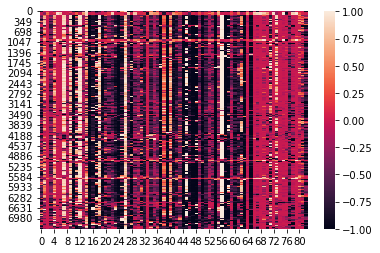

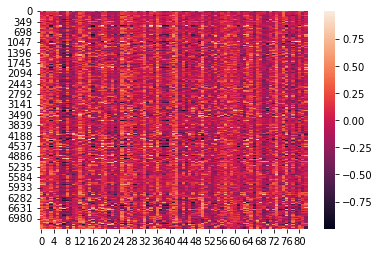

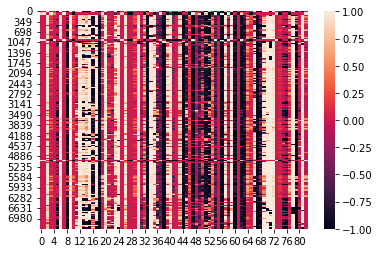

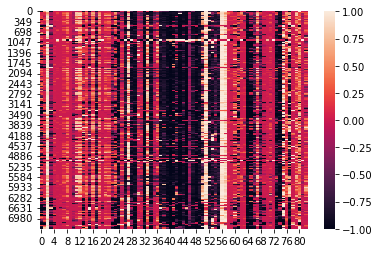

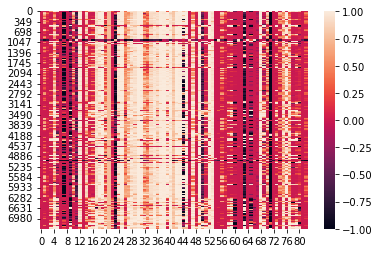

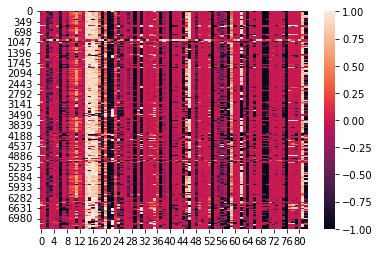

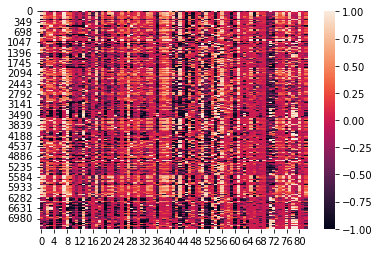

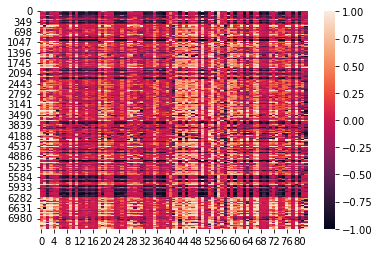

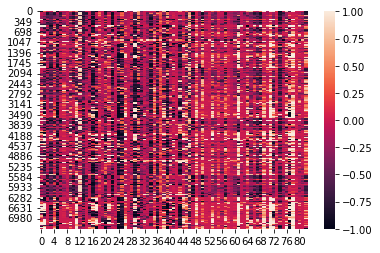

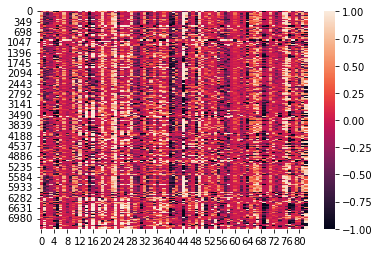

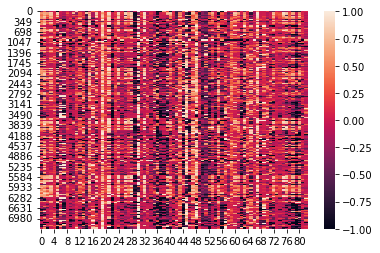

In [ ]:
for x in predict_test:
    sns.heatmap(x[1])
    plt.show()